# Eng. Abdallah Dwikat, Elevvopath Intern, 28th of August 2025.
# Walmart Sales Forecast

## Goals of Reporsitory: 
### * Predict future sales based on historical sales data°
### * Create time-based features (day, month, lag values)°
### * Apply regression models to forecast next period s sales°
### * Plot actual vs. predicted values over time

# 1. Imports

In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import pearsonr, spearmanr, kendalltau, f_oneway
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import time
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.preprocessing import OrdinalEncoder

# 2. Load and Inspect Data

In [30]:
df = pd.read_csv(r"C:\Users\hp\Elevvopath\7) Sales_Forecasting_Description\Walmart DataSet.csv")
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [31]:
df.info

<bound method DataFrame.info of       Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

       

In [32]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

# 3. Data Cleaning

In [35]:
# convert the date column to datetime format with %d-%m-%y
df['Date']=pd.to_datetime(df['Date'],format='%d-%m-%Y')
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [37]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


# 4. Exploratory Data Analysis (EDA)

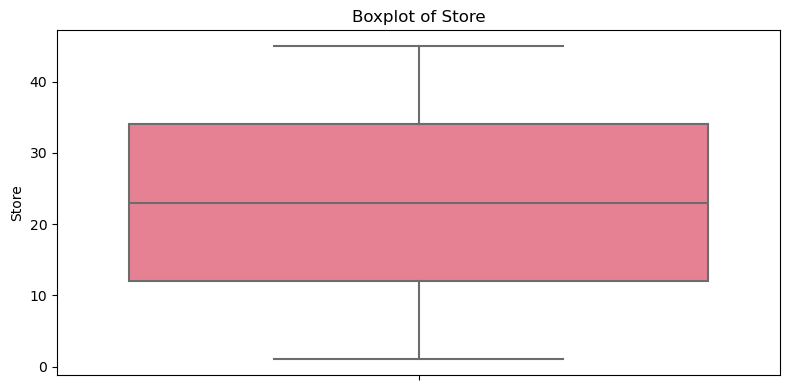

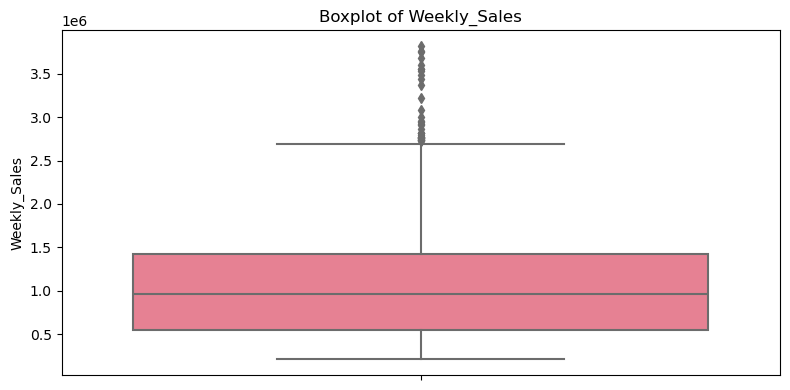

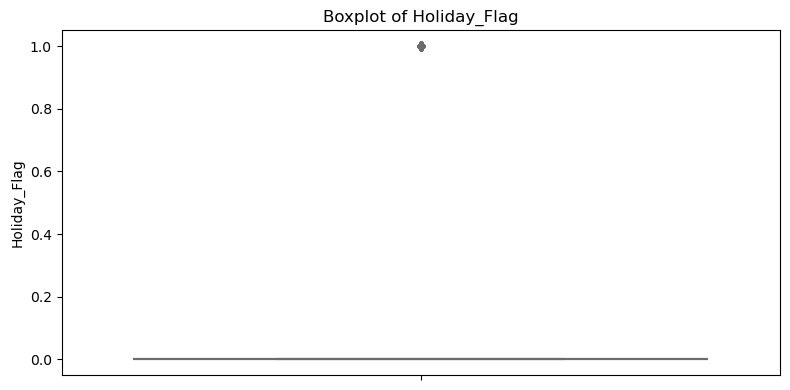

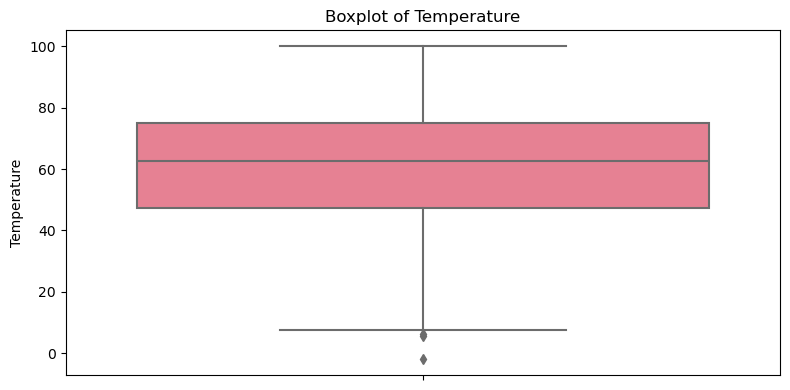

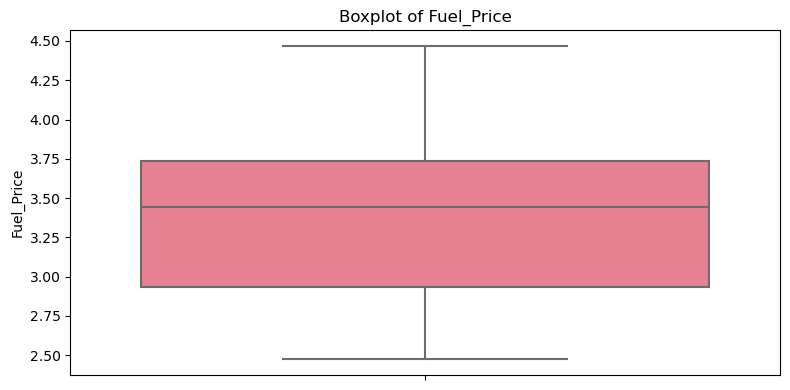

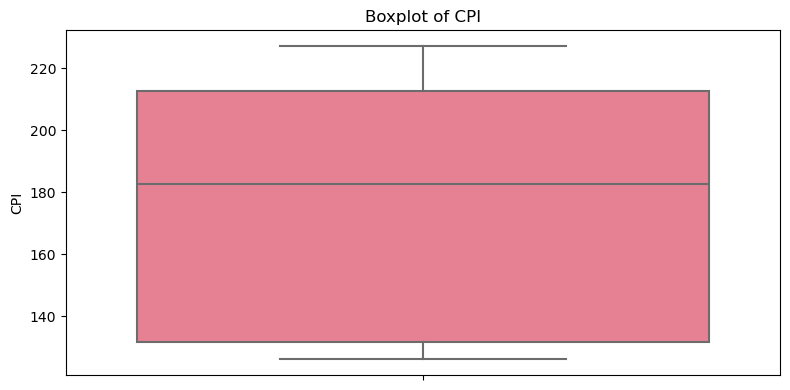

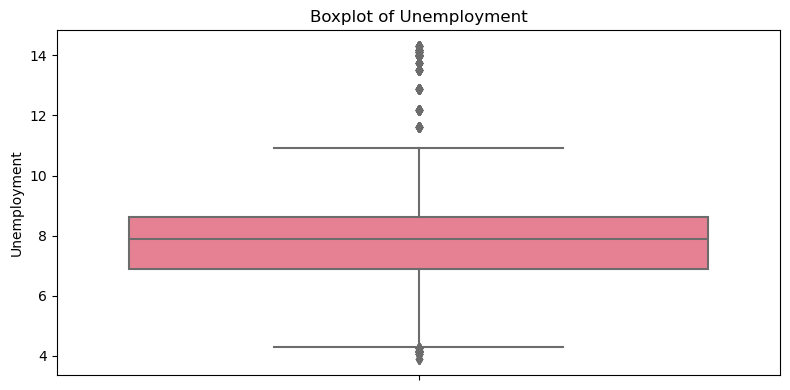

In [43]:
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        plt.figure(figsize=(8, 4))
        sns.boxplot(data=df, y=col)
        plt.title(f'Boxplot of {col}')
        plt.tight_layout()
        plt.show()

In [45]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

### Outliers: Prominent in Weekly_Sales and Unemployment, suggesting potential data cleaning needs.

In [46]:
#handling outliers
outliers=['Weekly_Sales','Unemployment']

In [47]:
for x in outliers:
  q1=df[x].quantile(0.25)
  q3=df[x].quantile(0.75)
  iqr=q3-q1
  upper=q3+1.5*iqr
  lower=q1-1.5*iqr
  df=df[(df[x]>=lower) & (df[x]<=upper)]

In [48]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


# 5. Statistical Data Analysis

In [20]:
numeric_cols = df.select_dtypes(include=['int64']).columns
skewness = df[numeric_cols].skew()
cols_to_log = skewness[abs(skewness) > 0.5].index
transformation_columns = [col for col in cols_to_log if col != 'loan_status']
print(f"Columns with skewness > 0.5: {cols_to_log.tolist()}" )

Columns with skewness > 0.5: []


### Outliers: Prominent in Weekly_Sales and MarkDown1–5, suggesting potential data cleaning needs.

In [23]:
for col in numerical_columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    percent_outliers = (outliers.count() / df[col].count()) * 100
    print(f"{col}: {percent_outliers:.2f}% outliers")

Store: 0.00% outliers
Temperature: 0.09% outliers
Fuel_Price: 0.00% outliers
MarkDown1: 7.97% outliers
MarkDown2: 20.13% outliers
MarkDown3: 18.25% outliers
MarkDown4: 15.95% outliers
MarkDown5: 6.72% outliers
CPI: 0.00% outliers
Unemployment: 6.83% outliers
Year: 0.00% outliers
Month: 0.00% outliers
Day: 0.00% outliers


In [25]:
df.dtypes

Store                    int64
Date            datetime64[ns]
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
IsHoliday                 bool
Year                     int64
Month                    int64
Day                      int64
Week                    UInt32
dtype: object

# 6. Key Observations

In [50]:
# to find the correlation between weekly_sales and Unemployment column
df[['Weekly_Sales','Unemployment']].corr()

,Weekly_Sales,Unemployment
Weekly_Sales,1.000000,-0.073227
Unemployment,-0.073227,1.000000


 #### since the correlation between weekly sales and unemployment column is -0.07 which is close to 0, that implies it is hardly possible that sales are affected by unemployment

In [52]:
# Group data by store and calculate the correlation for each store
store_correlations = df.groupby('Store')[['Weekly_Sales', 'Unemployment']].corr()
print(store_correlations)

# Find stores with the most negative correlation (most affected by unemployment)
stores_suffering_most = store_correlations.sort_values(by='Unemployment')
print(stores_suffering_most)

                    Weekly_Sales  Unemployment
Store                                         
1     Weekly_Sales      1.000000     -0.097955
      Unemployment     -0.097955      1.000000
2     Weekly_Sales      1.000000      0.054288
      Unemployment      0.054288      1.000000
3     Weekly_Sales      1.000000     -0.230413
...                          ...           ...
43    Unemployment     -0.201954      1.000000
44    Weekly_Sales      1.000000     -0.780076
      Unemployment     -0.780076      1.000000
45    Weekly_Sales      1.000000     -0.004041
      Unemployment     -0.004041      1.000000

[90 rows x 2 columns]
                    Weekly_Sales  Unemployment
Store                                         
44    Weekly_Sales      1.000000     -0.780076
4     Weekly_Sales      1.000000     -0.633422
13    Weekly_Sales      1.000000     -0.400254
39    Weekly_Sales      1.000000     -0.384681
42    Weekly_Sales      1.000000     -0.356355
...                          ...     

In [54]:
df.set_index(df['Date'],inplace=True)
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,,
2010-02-05,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
2010-02-12,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2010-02-19,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
2010-02-26,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
2010-03-05,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
2012-09-28,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
2012-10-05,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
2012-10-12,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667


In [55]:
df.drop('Date',axis=1,inplace=True)
df

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-02-05,1,1643690.90,0,42.31,2.572,211.096358,8.106
2010-02-12,1,1641957.44,1,38.51,2.548,211.242170,8.106
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106
2010-03-05,1,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...
2012-09-28,45,713173.95,0,64.88,3.997,192.013558,8.684
2012-10-05,45,733455.07,0,64.89,3.985,192.170412,8.667
2012-10-12,45,734464.36,0,54.47,4.000,192.327265,8.667


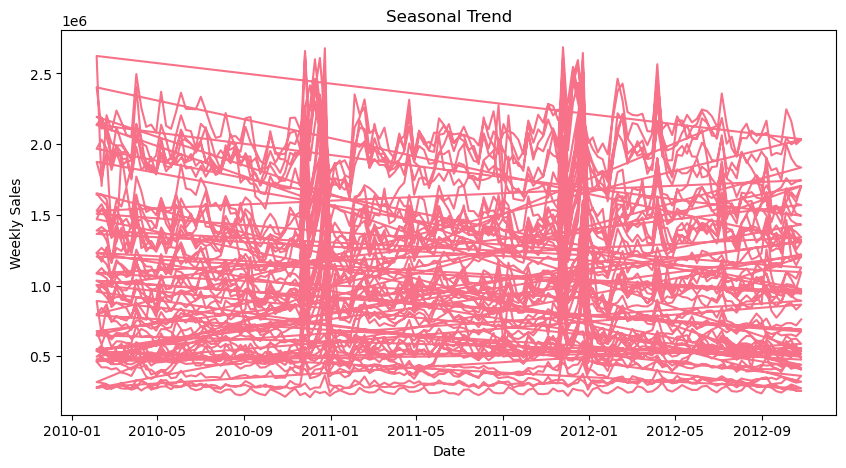

In [57]:
#If the weekly sales show a seasonal trend, when and what could be the reason?
plt.figure(figsize=(10,5))
plt.plot(df.index,df['Weekly_Sales'])
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Seasonal Trend')
plt.show()

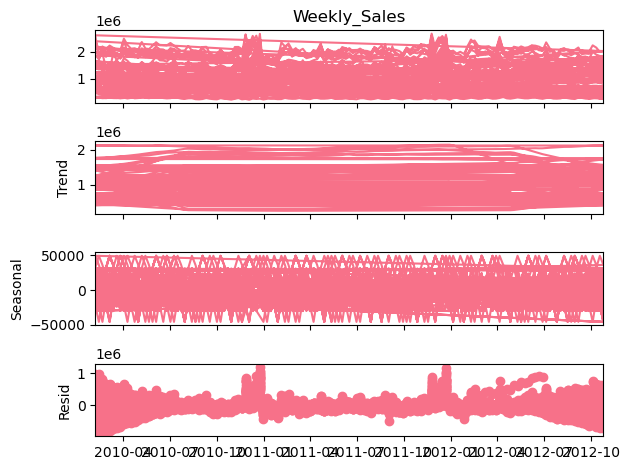

In [58]:
# to check seasonal decompose, period=52 as 52 weeks in 1 year, if it was monthly data then period would have been 12
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition= seasonal_decompose(df['Weekly_Sales'],period=52,model='additive')
decomposition.plot()
plt.show()

In [59]:
# Kruskal-Wallis Test is used to check for seasonality without graph
from scipy.stats import kruskal

def seasonality_test(series):
        seasonal = False
        idx = np.arange(len(series.index)) % 52
        H_statistic, p_value = kruskal(series, idx)
        if p_value <= 0.05:
            seasonal = True
        return seasonal

seasonality_test(df['Weekly_Sales'])

True

In [67]:
#creating a new dataframe with only information of weekly sales of store number 22
df22 = pd.DataFrame(df[df['Store']==22].groupby('Date')['Weekly_Sales'].sum())
df22

,Weekly_Sales
Date,
2010-02-05,1033017.37
2010-02-12,1022571.25
2010-02-19,988467.61
2010-02-26,899761.48
2010-03-05,1009201.24
...,...
2012-09-28,976479.51
2012-10-05,1009887.36
2012-10-12,1004039.84


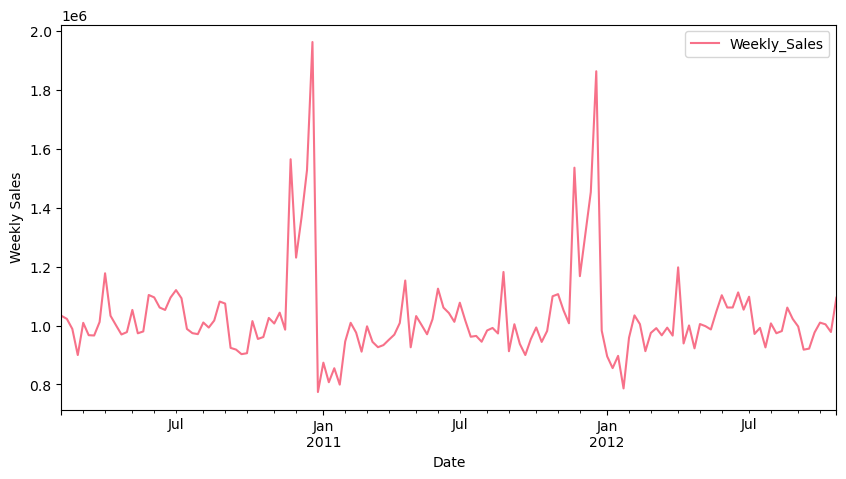

In [68]:
# plot of weekly sales of store number 22
df22.plot(figsize=(10,5))
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

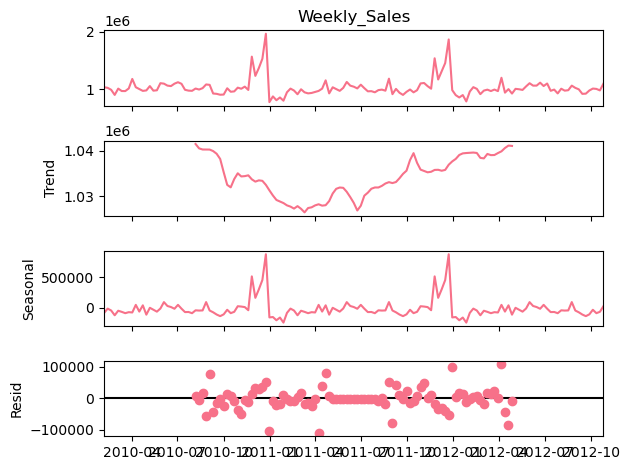

In [62]:
# seasonal decompose of store 22
decomposition1= seasonal_decompose(df22['Weekly_Sales'],period=52,model='additive')
decomposition1.plot()
plt.show()

### seasonality is around the beginning of each year, it might be because of new year people tend to shop more as compared to rest of the year therefore sales are increased

In [66]:
df.head(2)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-02-05,1,1643690.90,0,42.31,2.572,211.096358,8.106
2010-02-12,1,1641957.44,1,38.51,2.548,211.242170,8.106


In [63]:
#Does temperature affect the weekly sales in any manner?
df[['Weekly_Sales','Temperature']].corr()

,Weekly_Sales,Temperature
Weekly_Sales,1.000000,-0.040918
Temperature,-0.040918,1.000000


#### since correlation between temperatrue and weekly sales is -0.04 which is close to 0, hance we can say there's hardly any correlation i.e. temperature does not affect sales

In [64]:
#How is the Consumer Price index affecting the weekly sales of various stores?
df[['Weekly_Sales','CPI']].corr()

,Weekly_Sales,CPI
Weekly_Sales,1.000000,-0.082957
CPI,-0.082957,1.000000


In [70]:
#store wise correlation of weekly sales and CPI
affected_df= df.groupby('Store')[['Weekly_Sales','CPI']].corr()
print(affected_df)

most_affected= affected_df.sort_values(by='CPI')
print(most_affected)

                    Weekly_Sales       CPI
Store                                     
1     Weekly_Sales      1.000000  0.225408
      CPI               0.225408  1.000000
2     Weekly_Sales      1.000000 -0.063786
      CPI              -0.063786  1.000000
3     Weekly_Sales      1.000000  0.317250
...                          ...       ...
43    CPI              -0.285686  1.000000
44    Weekly_Sales      1.000000  0.740150
      CPI               0.740150  1.000000
45    Weekly_Sales      1.000000 -0.023548
      CPI              -0.023548  1.000000

[90 rows x 2 columns]
                    Weekly_Sales       CPI
Store                                     
36    Weekly_Sales      1.000000 -0.915095
14    Weekly_Sales      1.000000 -0.498495
35    Weekly_Sales      1.000000 -0.424107
30    Weekly_Sales      1.000000 -0.298188
43    Weekly_Sales      1.000000 -0.285686
...                          ...       ...
29    CPI              -0.072530  1.000000
7     CPI               0.28904

In [71]:
#Top performing stores according to the historical data.
top=df.groupby('Store')['Weekly_Sales'].sum()#.sort_values(ascending=False)
top.sort_values(ascending=False)

Store
20    2.800237e+08
14    2.761276e+08
2     2.687221e+08
13    2.682025e+08
10    2.556789e+08
27    2.480387e+08
4     2.446487e+08
1     2.224028e+08
6     2.210286e+08
39    2.074455e+08
19    2.066349e+08
31    1.996139e+08
24    1.940160e+08
11    1.939628e+08
41    1.813419e+08
32    1.668192e+08
18    1.551147e+08
22    1.470756e+08
26    1.434164e+08
34    1.382498e+08
23    1.372484e+08
35    1.315207e+08
8     1.299512e+08
17    1.277821e+08
45    1.123953e+08
21    1.081179e+08
25    1.010612e+08
40    9.669790e+07
43    9.056544e+07
15    8.913368e+07
7     8.159828e+07
42    7.956575e+07
9     7.778922e+07
29    7.714155e+07
16    7.425243e+07
37    7.420274e+07
30    6.271689e+07
3     5.758674e+07
36    5.341221e+07
5     4.547569e+07
44    4.329309e+07
33    3.716022e+07
28    2.110677e+07
12    1.638671e+07
38    7.347379e+06
Name: Weekly_Sales, dtype: float64

In [74]:
#The worst performing store, and how significant is the difference between the highest and lowest performing stores.
low=df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=True)
low

Store
38    7.347379e+06
12    1.638671e+07
28    2.110677e+07
33    3.716022e+07
44    4.329309e+07
5     4.547569e+07
36    5.341221e+07
3     5.758674e+07
30    6.271689e+07
37    7.420274e+07
16    7.425243e+07
29    7.714155e+07
9     7.778922e+07
42    7.956575e+07
7     8.159828e+07
15    8.913368e+07
43    9.056544e+07
40    9.669790e+07
25    1.010612e+08
21    1.081179e+08
45    1.123953e+08
17    1.277821e+08
8     1.299512e+08
35    1.315207e+08
23    1.372484e+08
34    1.382498e+08
26    1.434164e+08
22    1.470756e+08
18    1.551147e+08
32    1.668192e+08
41    1.813419e+08
11    1.939628e+08
24    1.940160e+08
31    1.996139e+08
19    2.066349e+08
39    2.074455e+08
6     2.210286e+08
1     2.224028e+08
4     2.446487e+08
27    2.480387e+08
10    2.556789e+08
13    2.682025e+08
2     2.687221e+08
14    2.761276e+08
20    2.800237e+08
Name: Weekly_Sales, dtype: float64

In [75]:
highest=top.max()
lowest=low.min()
difference=highest-lowest
print(f'the significant difference between highest and lowest sale is {difference}')

the significant difference between highest and lowest sale is 272676355.92


# 7. Model Building
### ADFuller Test for stationarity

In [76]:
# ADFuller test to check for stationarity
from statsmodels.tsa.stattools import adfuller
result=adfuller(df['Weekly_Sales'])
print('P_value',result[1])

P_value 4.6199440837927695e-05


In [77]:
#since pval>0.05, there data is not stationary, so we will now make the data stationary
log_df=np.log(df['Weekly_Sales'])
log_df.dropna(inplace=True)

In [78]:
mean=log_df.rolling(window=52).mean()

In [79]:
# Differencing
new_df= log_df- mean
new_df.dropna(inplace=True)

In [80]:
result=adfuller(new_df)
print('P_value',result[1])

P_value 5.290971950195505e-16


### Using predictive modeling techniques to forecast the sales for each store for the next 12 weeks.

In [83]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [85]:
# to know the best parameters for p,d,q
from pmdarima import auto_arima
arima= auto_arima(df['Weekly_Sales'],seasonal=True,trace=True, enforce_invertibility=False, enforce_stationarity=False)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=157799.770, Time=1.79 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=158759.855, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=158100.474, Time=0.24 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=157926.164, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=158757.860, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=157907.345, Time=0.92 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=157866.105, Time=0.96 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=157679.540, Time=1.57 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=157731.902, Time=1.50 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=157692.254, Time=4.17 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=157681.736, Time=2.86 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=157713.834, Time=1.87 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=157712.672, Time=1.17 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=157608.477, Time=4.35 sec
 ARIM

In [87]:
train= df['Weekly_Sales'].iloc[:2960]
test= df['Weekly_Sales'].iloc[2960:]

In [88]:
from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults
from statsmodels.tsa.arima.model import ARIMA

#model=ARIMA(train,order=(5,1,5), enforce_invertibility=False, enforce_stationarity=False)
#model=model.fit()


# SARIMAX Model
model=SARIMAX(df22['Weekly_Sales'],order=(5,1,5),seasonal_order=(5,1,5,52), enforce_invertibility=False,enforce_stationarity=False)
model=model.fit()
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                       Weekly_Sales   No. Observations:                  143
Model:             SARIMAX(5, 1, 5)x(5, 1, 5, 52)   Log Likelihood                   0.000
Date:                            Mon, 25 Aug 2025   AIC                             42.000
Time:                                    18:53:36   BIC                                nan
Sample:                                02-05-2010   HQIC                               nan
                                     - 10-26-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2166         -0        inf      0.000      -1.217      -1.217
ar.L2         -0.9360         -0   

# 8. predictiosn for store 22

In [89]:
# Defining training and testing set of store 22 weekly sales information
train1=df22['Weekly_Sales'].iloc[:75]
test1=df22['Weekly_Sales'].iloc[75:]

In [90]:
# making Predictions
df22['Predictions']=model.predict(start=len(train1),end=len(train1)+len(test1)-1,dynamic=True)
df22[['Weekly_Sales','Predictions']]          # Predictions for first 75 records is NaN, predictions are made only for last (143-74)= 68 records

,Weekly_Sales,Predictions
Date,,
2010-02-05,1033017.37,NaN
2010-02-12,1022571.25,NaN
2010-02-19,988467.61,NaN
2010-02-26,899761.48,NaN
2010-03-05,1009201.24,NaN
...,...,...
2012-09-28,976479.51,1.483318e+06
2012-10-05,1009887.36,1.597960e+06
2012-10-12,1004039.84,1.534783e+06


<Axes: xlabel='Date'>

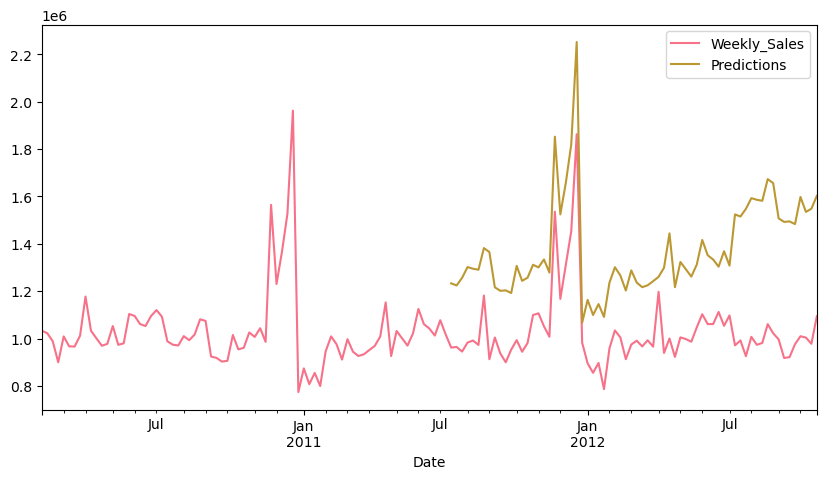

In [91]:
df22[['Weekly_Sales','Predictions']].plot(figsize=(10,5))

In [92]:
# Forcasting Sales for next 12 weeks for store 22
forecast=model.forecast(steps=12)
forecast

2012-11-02    1.212285e+06
2012-11-09    1.176948e+06
2012-11-16    1.128439e+06
2012-11-23    1.672924e+06
2012-11-30    1.298890e+06
2012-12-07    1.438789e+06
2012-12-14    1.582330e+06
2012-12-21    1.999425e+06
2012-12-28    1.111048e+06
2013-01-04    1.026683e+06
2013-01-11    9.871260e+05
2013-01-18    1.030162e+06
Freq: W-FRI, Name: predicted_mean, dtype: float64

<Axes: xlabel='Date'>

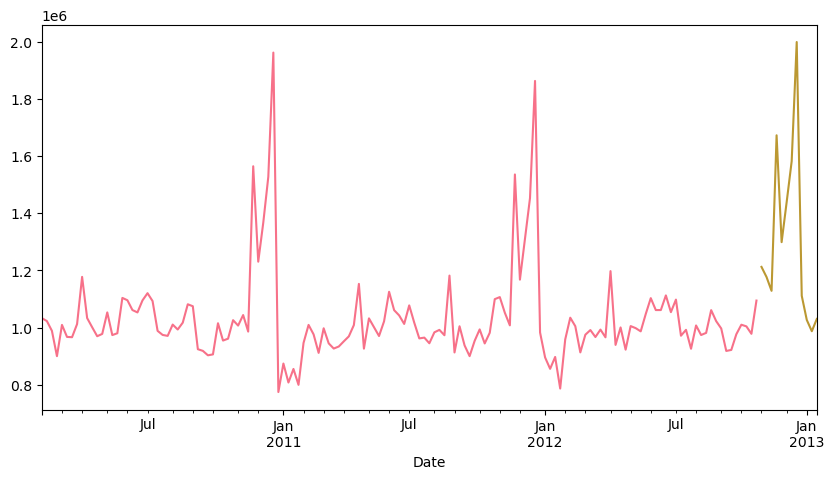

In [93]:
plt.figure(figsize=(10,5))
df22['Weekly_Sales'].plot()
forecast.plot()

# 9. Sales forcasting for all the stores for next 12 weeks

In [94]:
from statsmodels.tsa.arima.model import ARIMA

# Function to forecast sales for a single store
def forecast_store_sales(store_df, periods=12):
    """Forecasts sales for a given store using ARIMA model.

    Args:
        store_data: DataFrame containing weekly sales for a single store.
        periods: Number of weeks to forecast.

    Returns:
        DataFrame containing forecasted sales.
    """
    try:
        # Fit ARIMA model
        model = ARIMA(store_df['Weekly_Sales'], order=(5, 1, 5))  # Example order
        model = model.fit()

        # Make predictions
        forecast = model.forecast(steps=periods)
        return forecast

    except Exception as e:
        print(f"Error forecasting for store: {e}")
        return pd.Series(index=pd.date_range(start=store_df.index[-1] + pd.Timedelta(days=7), periods=periods), df=[np.nan] * periods)


# Create an empty dictionary to store forecasts
forecasts = {}

# Loop through each unique store
for x in df['Store'].unique():
    # Select data for the current store
    store_x = df[df['Store'] == x].copy()
    store_df = store_x.groupby('Date')['Weekly_Sales'].sum() #Aggregate by date

    #Forecast for that store
    forecasts[x] = forecast_store_sales(store_df.to_frame())

# Combine forecasts into a single DataFrame
forecast_df = pd.DataFrame(forecasts)
forecast_df

,1,2,3,4,5,6,7,8,9,10,...,36,37,38,39,40,41,42,43,44,45
2012-11-02,1.612277e+06,NaN,414308.203650,NaN,327890.828671,NaN,515020.973671,914842.420073,554834.012807,NaN,...,273530.578652,535557.734505,444011.427244,1.614506e+06,NaN,1.341543e+06,567160.903100,611134.138452,347069.662837,764268.380193
2012-11-09,1.567798e+06,NaN,413263.699929,NaN,321239.436276,NaN,533863.263703,886364.489154,532847.224859,NaN,...,293557.131812,518973.239960,467712.406107,1.573340e+06,NaN,1.356080e+06,621116.670437,634056.127954,346973.741697,772582.078064
2012-11-16,1.501163e+06,NaN,407241.370158,NaN,316605.549813,NaN,550389.019450,889669.689624,547860.932936,NaN,...,296126.163524,532205.501622,435091.705744,1.575919e+06,NaN,1.323538e+06,578987.330198,627406.888787,341931.030501,764636.701953
2012-11-23,1.556896e+06,NaN,407718.825412,NaN,326060.656691,NaN,556553.577213,908424.189421,568116.024104,NaN,...,278687.891092,538333.394190,425026.896935,1.583199e+06,NaN,1.339770e+06,518625.146197,595898.334975,353008.324597,781526.343444
2012-11-30,1.617194e+06,NaN,420651.994127,NaN,328908.657984,NaN,572342.345371,926026.426286,565261.058734,NaN,...,270415.700046,532776.668652,427840.560210,1.573682e+06,NaN,1.364532e+06,536533.648212,597654.597569,345513.809388,776165.901834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-02-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.034772e+06,NaN,NaN,NaN,NaN,NaN
2012-03-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.068132e+06,NaN,NaN,NaN,NaN,NaN
2012-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.062853e+06,NaN,NaN,NaN,NaN,NaN
2012-03-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.058959e+06,NaN,NaN,NaN,NaN,NaN


In [95]:
forecast_df.T

,2012-11-02,2012-11-09,2012-11-16,2012-11-23,2012-11-30,2012-12-07,2012-12-14,2012-12-21,2012-12-28,2013-01-04,...,2012-01-20,2012-01-27,2012-02-03,2012-02-10,2012-02-17,2012-02-24,2012-03-02,2012-03-09,2012-03-16,2012-03-23
1,1.612277e+06,1.567798e+06,1.501163e+06,1.556896e+06,1.617194e+06,1.595177e+06,1.531839e+06,1.535319e+06,1.597107e+06,1.606222e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.143082e+05,4.132637e+05,4.072414e+05,4.077188e+05,4.206520e+05,4.166185e+05,4.118744e+05,4.123448e+05,4.157008e+05,4.199394e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,3.278908e+05,3.212394e+05,3.166055e+05,3.260607e+05,3.289087e+05,3.252018e+05,3.225677e+05,3.257667e+05,3.283876e+05,3.260803e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5.150210e+05,5.338633e+05,5.503890e+05,5.565536e+05,5.723423e+05,5.787088e+05,5.874909e+05,5.902579e+05,5.906690e+05,5.887985e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9.148424e+05,8.863645e+05,8.896697e+05,9.084242e+05,9.260264e+05,9.146545e+05,9.089089e+05,9.105763e+05,9.144074e+05,9.110294e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,5.548340e+05,5.328472e+05,5.478609e+05,5.681160e+05,5.652611e+05,5.429713e+05,5.479270e+05,5.664397e+05,5.653107e+05,5.466368e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Eng. Abdallah Dwikat, Elevvopath Intern, 28th of August 2025.